# StackOverflow Tags Prediction without specific ML packagess

# Outline
- [ 1 - Import Data](#1)
- [ 2 - Exploring and preparing data for model](#2)
  - [ 2.1 - Bag of words](#2.1)
  - [ 2.2 - TF-IDF](#2.2)
  - [ 2.3 - CBOW](#2.3)
    - [ 2.3.1 - Data prepare](#2.3.1)
    - [ 2.3.2 - Train neuron network and transform train/test data](#2.3.2)
    - [ 2.3.3 - PCA for plotting results](#2.3.3)
- [ 3 - Model creation and evaluation](#3)
    - [ 3.1 - BOW model](#3.1)
    - [ 3.2 - TFIDF model](#3.2)
    - [ 3.3 - CBOW model](#3.3)    
    

<a name="1"></a>
## 1 - Import Data

TO DO!!!!

In this section, you will use [`Kaggle Questions csv file`](https://www.kaggle.com/code/miljan/predicting-tags-for-stackoverflow/input?select=Questions.csv) to transform the sentences into integers, so they can be fed into the model you will build later on.
[`Kaggle Labled Tags csv file`](https://www.kaggle.com/code/miljan/predicting-tags-for-stackoverflow/input?select=Tags.csv)

In [3]:
import numpy as np
import pandas as pd
from scipy import sparse as sp_sparse
import re
%matplotlib inline
import matplotlib.pyplot as plt

from ast import literal_eval

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sergeiakhmadulin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
train = pd.read_csv('/Users/sergeiakhmadulin/Library/CloudStorage/GoogleDrive-akhmadulinsergey@gmail.com/My Drive/Simple NLP/Questions.csv/Questions.csv',\
                    encoding = "ISO-8859-1", nrows=100000,index_col=False)

In [5]:
y_data = pd.read_csv('/Users/sergeiakhmadulin/Library/CloudStorage/GoogleDrive-akhmadulinsergey@gmail.com/My Drive/Simple NLP/Tags.csv/Tags_1.csv',\
                     encoding = "ISO-8859-1",index_col=False)

In [6]:
all_data = pd.concat([train, y_data], axis=1)

<a name="2"></a>
## 2 - Exploring and preparing data for model

In [7]:
all_data.head()

,title,tags
0,How to draw a stacked dotplot in R?,['r']
1,mysql select all records where a datetime fiel...,"['php', 'mysql']"
2,How to terminate windows phone 8.1 app,['c#']
3,get current time in a specific country via jquery,"['javascript', 'jquery']"
4,Configuring Tomcat to Use SSL,['java']


In [8]:
len(all_data)

100000

In [9]:
all_data['tags'] = all_data['tags'].apply(literal_eval)

In [10]:
def most_common_words(text):
    words_counts = {}

    for i in text:
        try:
            for j in i.split():
                words_counts[j] = words_counts.get(j, 0) + 1
        except:
            for j in i:
                words_counts[j] = words_counts.get(j, 0) + 1
    return words_counts

words_counts = most_common_words(all_data["tags"])
words_counts = dict(sorted(words_counts.items(), key=lambda x: x[1], reverse=True))

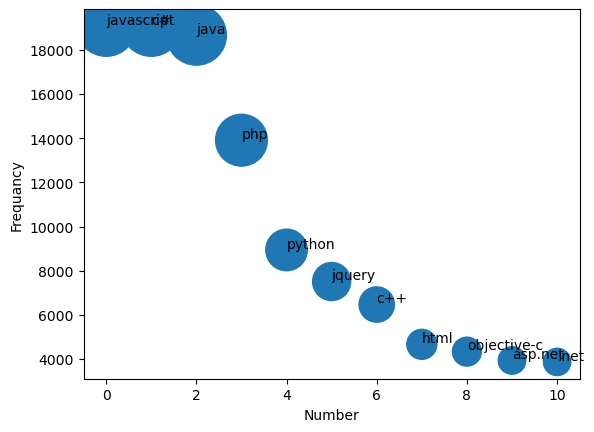

In [11]:
max_words = 11
x = range(max_words)
y = list(words_counts.values())[:max_words]
z = [i/10 for i in list(words_counts.values())[:max_words]]

fig, ax = plt.subplots()

ax.set_xlabel("Number")
ax.set_ylabel("Frequancy")
    
ax.scatter(x, y, s=z)

for i, txt in enumerate(list(words_counts.keys())[:max_words]):
    ax.annotate(txt, (x[i], y[i]+100))


plt.show()

In [12]:
def train_test_splitting(X, y, test_size, shuffle=True):
    length_data = len(X)
    test_len = int(length_data*test_size)
    train_len = length_data - test_len
    if shuffle:
        index = np.random.permutation(length_data)
    else:
        index = np.arange(length_data)
    train_index = index[:train_len]
    test_index = index[train_len:]

    return X[train_index],X[test_index],y[train_index],y[test_index]

In [19]:
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_splitting(all_data["title"], all_data["tags"], test_size=0.3 , shuffle=True) 

In [24]:
def text_prepare(text):
    
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = set(stopwords.words('english'))
    text = text.lower()

    text = REPLACE_BY_SPACE_RE.sub(r' ',text)
    text = BAD_SYMBOLS_RE.sub(r'',text)
    text = [w for w in text.split() if not w in STOPWORDS]
    
    return ' '.join(text)

In [27]:
X_train = [text_prepare(x) for x in X_train]
X_test = [text_prepare(x) for x in X_test]

<a name="2.1"></a>
## 2.1 - Bag of words

In [28]:
import Bagofwords as BOW

BagOW = BOW.BagOfWords(maximum_words = 5000)
BagOW.fit(X_train)
X_train_mybag = BagOW.transform(X_train)
X_test_mybag = BagOW.transform(X_test)
bag_of_words_dic = BagOW.get_vocab()

In [27]:
X_train_mybag

<70000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 360175 stored elements in List of Lists format>

<a name="2.2"></a>
## 2.2 - TF-IDF

 For this approuch we'll create module Tfidf that create a class and make fit, transform tramsformation

In [34]:
import Tfidf as tf

tfidf_obj = tf.TFIDF()
tfidf_obj.fit(X_train)

X_train_tfidf = tfidf_obj.transform(X_train)
X_test_tfidf = tfidf_obj.transform(X_test)
tfidf_vocab = tfidf_obj.get_vocab()

tfidf_index_to_word = {index:word for index,word in enumerate(tfidf_vocab)}

/Users/sergeiakhmadulin/My Drive/Simple NLP/Tfidf.py:55: RuntimeWarning: divide by zero encountered in divide
  norm_tfidf = tfidf.multiply(1/np.sqrt(np.sum(tfidf.power(2), axis = 1)).reshape((length_rows,1)))


In [ ]:
from importlib import reload
reload(tf)

In [38]:
X_train_tfidf

<70000x25420 sparse matrix of type '<class 'numpy.float64'>'
	with 389409 stored elements in List of Lists format>

<a name="2.3"></a>
## 2.3 - CBOW

 For this approuch we'll create two dictionaries to convert all unick words into a number and vise versa. Next we'll create two arres one with context words and another with center, that is what we are going to feed into neuron network. Train simple neuron networt with only 2 layers. As a result we'll get two matrises with trained weights the mean sum of them give us embedings of each word.

<a name="2.3.1"></a>
### 2.3.1 - Data prepare

In [29]:
def add_pad(text, num_of_padding, padding_car):
    text_with_pad = []
    for sent in text:
        sent = (padding_car + " ") * num_of_padding + sent + (" " + padding_car) * num_of_padding
        text_with_pad.append(sent)
    return text_with_pad

In [31]:
def get_dict(text): 
    idx = 0
    word2Ind = {}
    Ind2word = {}
    for sent in text:
        try:
            for word in sent.split():
                if word not in word2Ind.keys():
                    word2Ind[word] = idx
                    Ind2word[idx] = word
                    idx += 1
        except:
            for word in sent:
                if word not in word2Ind.keys():
                    word2Ind[word] = idx
                    Ind2word[idx] = word
                    idx += 1
    return word2Ind,Ind2word

In [107]:
def get_data_with_window(text, num_neighbor_words, padding = False):
    
    if padding:
        text = add_pad(text, num_neighbor_words, "PAD")
        
    word2Ind, Ind2word = get_dict(text)
    vector_lenght = len(word2Ind)
    count = 0
    for sent in text:
        length = len(sent.split()) - 2*num_neighbor_words
        if length > 0:
            count += length
    X_matrix = sp_sparse.lil_matrix((count,vector_lenght))
    y_matrix = sp_sparse.lil_matrix((count,vector_lenght))
    Y = []
    n = 0
    for row, sent in enumerate(text):
        sent_to_separete = sent.split()
        for i in range(num_neighbor_words, len(sent_to_separete) - num_neighbor_words):
            center_word = sent_to_separete[i]
            context_words = sent_to_separete[(i - num_neighbor_words):i] + sent_to_separete[(i+1):(i+num_neighbor_words+1)]
            
            y_matrix[n, word2Ind[center_word]] = 1
            Y.append(word2Ind[center_word])
            for con_word in context_words:
                X_matrix[n, word2Ind[con_word]] += 1
                print(center_word, con_word)
            n += 1
    X_matrix = (X_matrix/sp_sparse.lil_matrix.sum(X_matrix, axis = 1)).tolil()
    Y = np.array(Y)
    return X_matrix, y_matrix, word2Ind, Ind2word

In [148]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample corpus
corpus = [
    "the quick brown fox jumps",
    "over the lazy dog",
    "hello world over the lazy dog",
    # Add more sentences as needed
]

# Tokenize and create vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [150]:
import numpy as np

context_window = 2

def generate_data(corpus, context_window, tokenizer):
    sequences = tokenizer.texts_to_sequences(corpus)
    print(sequences)
    X, y = [], []
    for sequence in sequences:
        for i in range(context_window, len(sequence) - context_window):
            context = sequence[i - context_window : i] + sequence[i + 1 : i + context_window + 1]
            target = sequence[i]
            X.append(context)
            y.append(target)
    return np.array(X), np.array(y)

X_train, y_train = generate_data(corpus, context_window, tokenizer)

[[1, 5, 6, 7, 8], [2, 1, 3, 4], [9, 10, 2, 1, 3, 4]]


In [156]:
y_train

array([6, 2, 1])

In [158]:
X_train

array([[ 1,  5,  7,  8],
       [ 9, 10,  1,  3],
       [10,  2,  3,  4]])

In [133]:
embedding_dim = 100

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [162]:
model.param()

AttributeError: 'Sequential' object has no attribute 'param'

In [135]:
epochs = 50
batch_size = 16

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 2.4006
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3855
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.3704
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3553
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3401
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.3248
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3095
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.2941
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.2786
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.2629
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2472
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2312
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.2151
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1988
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1824
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━

In [75]:
X[0].A

array([[0.5 , 0.  , 0.25, ..., 0.  , 0.  , 0.  ]])

In [99]:
Ind2word[np.argmax(y[0].A)]

'imlementing'

In [81]:
X, y, word2Ind, Ind2word  = get_data_with_window(X_train, 2, padding = True)

In [42]:
X.shape, max(Ind2word)

((396118, 25421), 25420)

<a name="2.3.2"></a>
### 2.3.2 - Train neuron network and transform train/test data

In [75]:
import NN_for_CBOW as NN

In [79]:
from importlib import reload
reload(NN)

<module 'NN_for_CBOW' from '/Users/sergeiakhmadulin/My Drive/Simple NLP/NN_for_CBOW.py'>

In [ ]:
res, W_1,W_2 = NN.train_network(X, y, learning_rate = 0.5, hidden_neurons = 128, num_epoch = 4,initialization = "xavier")

In [ ]:
X

In [ ]:
# Resume training code, with alredy updated weights

# res, W_1,W_2 = NN.train_network(X, y, hidden_neurons = 64, num_epoch = 6, batchsize = 100, \
#                                 initialization = "custom",weights_1 = W_1, weights_2 = W_2)

In [45]:
W_1 = np.array(pd.read_csv("weights_1.csv", header=None))
W_2 = np.array(pd.read_csv("weights_2.csv", header=None))

In [1]:
word_embedings = (W_1 + W_2.T)/2

NameError: name 'W_1' is not defined

<a name="2.3.3"></a>
### 2.3.3 - PCA for plotting results

In [49]:
import PCA as pca
pca_obj = pca.PCA()

In [181]:
from importlib import reload
reload(pca)
pca_obj = pca.PCA()

In [53]:
W_2.T[1:].shape

(25420, 64)

In [85]:
all_embedings_for_model = word_embedings[1:]

In [87]:
Ind2word_no_pad = {k:v for k,v in enumerate(list(Ind2word.values())[1:])}
word2Ind_no_pad = {k:v for v,k in Ind2word_no_pad.items()}

In [97]:
Ind2word_no_pad

{0: 'imlementing',
 1: 'custom',
 2: 'irouter',
 3: 'aspnet',
 4: '5',
 5: 'vnext',
 6: 'mvc',
 7: '6',
 8: 'uiwebview',
 9: 'application',
 10: 'using',
 11: 'proxy',
 12: 'server',
 13: 'formal',
 14: 'argument',
 15: 'type',
 16: 'matched',
 17: 'multiple',
 18: 'actual',
 19: 'arguments',
 20: 'android',
 21: 'java',
 22: 'embed',
 23: 'online',
 24: 'video',
 25: 'python',
 26: 'copying',
 27: 'one',
 28: 'work',
 29: 'sheet',
 30: 'another',
 31: 'excel',
 32: 'pdo',
 33: 'rowcount',
 34: 'select',
 35: 'mysql',
 36: 'load',
 37: 'backgroundimages',
 38: 'js',
 39: 'css',
 40: 'upload',
 41: 'image',
 42: 'codeigniter',
 43: 'working',
 44: 'ajax',
 45: 'example',
 46: 'reduce',
 47: 'quality',
 48: 'uploading',
 49: 'paperclip',
 50: 'making',
 51: 'column',
 52: 'editable',
 53: 'gridview',
 54: 'plot',
 55: 'jpg',
 56: 'base',
 57: 'graphics',
 58: 'r',
 59: 'string',
 60: 'comparison',
 61: 'ignoring',
 62: 'encoding',
 63: 'properly',
 64: 'register',
 65: 'protocol',
 66: '

In [89]:
pca_obj.fit(all_embedings_for_model)

In [91]:
word_embedings_pca = pca_obj.pca_transform(all_embedings_for_model)

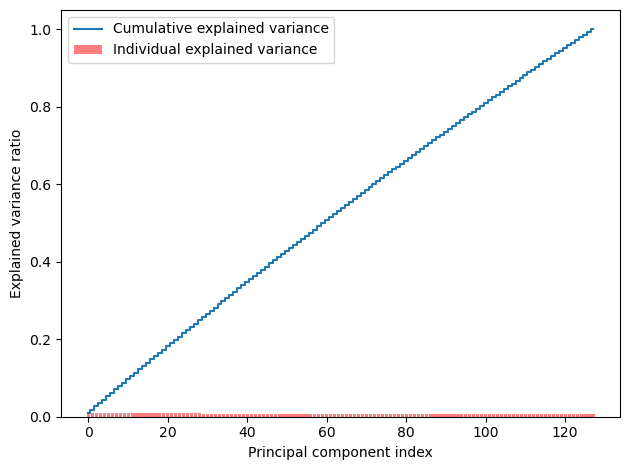

In [93]:
pca_obj.plot_explained_varience(all_embedings_for_model)

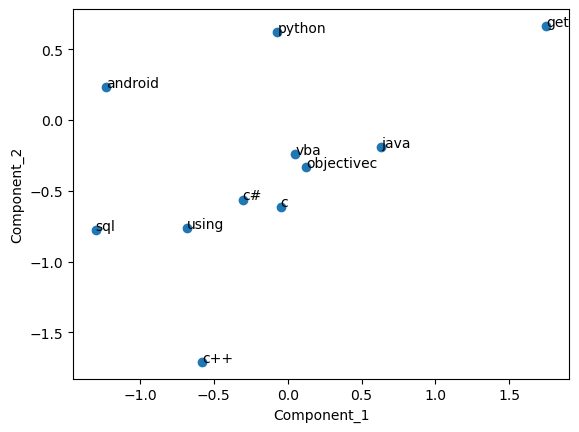

In [101]:
word_embedings_pca_2_comp = pca_obj.pca_transform(all_embedings_for_model, 2)
pca_obj.plot_some_data(word_embedings_pca_2_comp, word2Ind_no_pad, ['python','c','c++','c#','objectivec','sql','vba','get','java', 'android'])

In [219]:
embedings_means_for_model = np.mean(word_embedings[1:,:46],axis = 1)

In [191]:
def transform_to_vector(data_to_transform, word2num_dictionary, embeding_matrix):
    length_rows = len(data_to_transform)
    length_col = embeding_matrix.shape[0]
    TF_matrix = sp_sparse.lil_matrix((length_rows,length_col))
    for row,sent in enumerate(data_to_transform):
        for word in sent.split():
            if word in list(word2num_dictionary.keys()):
                num_of_word = word2num_dictionary.get(word,0)
                TF_matrix[row,num_of_word] = embeding_matrix[num_of_word]
    
    return TF_matrix

In [223]:
X_train_cbow = transform_to_vector(X_train, word2Ind_no_pad, embedings_means_for_model)
X_test_cbow = transform_to_vector(X_test, word2Ind_no_pad, embedings_means_for_model)

<a name="3"></a>
## 3 - Model creation and evaluation

In [40]:
import Binarizer as binar

In [42]:
bnr = binar.Binarizer()
bnr.fit(y_train)
y_train_mat = bnr.transform(y_train)
y_test_mat = bnr.transform(y_test)

In [44]:
import Logistic_Reg as LR

In [46]:
lib = "/Users/sergeiakhmadulin/Library/CloudStorage/GoogleDrive-akhmadulinsergey@gmail.com/My Drive/Simple NLP/"

def train_model(model, model_name, x_train, y_train, x_test, batchsize = None, resume_training = False, save_results = True):
    if resume_training:
        try:
            all_weights = np.load(lib + 'all_weights_'+ model_name +'.npy',allow_pickle='TRUE').item()
            all_preds = np.load(lib + 'all_preds_'+ model_name +'.npy')
            all_preds_train = np.load(lib + 'all_preds_train_'+ model_name +'.npy')
            starting_point = all_weights['w'].shape[0]
            if starting_point == y_train.shape[1]:
                print("All models trained")
                return all_weights, all_preds

        except (FileNotFoundError, IOError):
            starting_point = 0
    else:
        starting_point = 0

    for i in range(starting_point, y_train.shape[1]):
        model.fit(x_train, y_train[:,i, None],batchsize = batchsize)
        weights = model.get_param()
        predictions = model.predict_proba(x_test)
        predictions_train = model.predict_proba(x_train)
        if i == 0:
            all_weights = weights
            all_preds = predictions
            all_preds_train = predictions_train
        else:
            all_weights = {key:np.concatenate(([all_weights[key],weights[key]]), axis=0) for key in all_weights.keys()}
            all_preds = np.concatenate((all_preds ,predictions), axis=1)
            all_preds_train = np.concatenate((all_preds_train ,predictions_train), axis=1)
        if save_results:
            np.save(lib + 'all_weights_'+ model_name +'.npy', all_weights)
            np.save(lib + 'all_preds_'+ model_name +'.npy', all_preds)
            np.save(lib + 'all_preds_train_'+ model_name +'.npy', all_preds_train)
            print("data stored", i)

    print("All models trained")
    return all_preds, all_weights

<a name="3.1"></a>
## 3.1 - BOW model

In [186]:
Log_reg = LR.MyLogisticRegression(learning_rate = 0.01, num_iterations = 50)
model_name = "BOW"

In [474]:
w, p = train_model(Log_reg, model_name, X_train_mybag, y_train_mat, X_test_mybag, resume_training = False)

data stored 0
data stored 1
data stored 2
data stored 3
data stored 4
data stored 5
data stored 6
data stored 7
data stored 8
data stored 9
data stored 10
data stored 11
data stored 12
data stored 13
data stored 14
data stored 15
data stored 16
data stored 17
data stored 18
data stored 19
data stored 20
data stored 21
data stored 22
data stored 23
data stored 24
data stored 25
data stored 26
data stored 27
data stored 28
data stored 29
data stored 30
data stored 31
data stored 32
data stored 33
data stored 34
data stored 35
data stored 36
data stored 37
data stored 38
data stored 39
data stored 40
data stored 41
data stored 42
data stored 43
data stored 44
data stored 45
data stored 46
data stored 47
data stored 48
data stored 49
data stored 50
data stored 51
data stored 52
data stored 53
data stored 54
data stored 55
data stored 56
data stored 57
data stored 58
data stored 59
data stored 60
data stored 61
data stored 62
data stored 63
data stored 64
data stored 65
data stored 66
data 

In [190]:
all_weights_BOW = np.load('all_weights_'+ model_name +'.npy',allow_pickle='TRUE').item()
all_preds_test_BOW = np.load('all_preds_'+ model_name +'.npy').astype(np.float16)
all_preds_train_BOW = np.load('all_preds_train_'+ model_name +'.npy').astype(np.float16)

In [192]:
all_preds_test_BOW

array([[0.1735  , 0.01253 , 0.037   , ..., 0.00863 , 0.0056  , 0.00526 ],
       [0.1588  , 0.01074 , 0.0296  , ..., 0.00732 , 0.0046  , 0.004684],
       [0.1671  , 0.011154, 0.03001 , ..., 0.00842 , 0.00495 , 0.004604],
       ...,
       [0.1659  , 0.012245, 0.03397 , ..., 0.00849 , 0.005367, 0.00509 ],
       [0.02975 , 0.00813 , 0.02156 , ..., 0.008675, 0.006218, 0.00381 ],
       [0.1179  , 0.0109  , 0.02492 , ..., 0.006645, 0.004116, 0.003736]],
      dtype=float16)

In [251]:
import Classification_report as CR
rep = CR.Report()

In [514]:
#Finding the optimal threshold based on train data
FPR, TPR, thresh = dict(), dict(), dict()
opt_thresh = []
for i in range(y_train_mat.shape[1]):
    FPR[i], TPR[i], thresh[i] = rep_BOW.calculate_ROC(y_train_mat[:,i], all_preds_train[:,i])
    opt_thresh.append(thresh[i][np.argmax(TPR[i] - FPR[i])])
opt_thresh = np.sum(opt_thresh)/y_train_mat.shape[1]

In [580]:
Y_train_zero_ones = (all_preds_train >= 0.5).astype(int)
rep_BOW.calc_metrics(y_train_mat, Y_train_zero_ones)

               precision   recall   f1-score

    micro avg       0.94      0.27      0.41
    macro avg       0.26      0.07      0.10
    weighted avg    0.69      0.27      0.37



In [582]:
Y_test_zero_ones = (all_preds_test >= 0.5).astype(int)
rep_BOW.calc_metrics(y_test_mat, Y_test_zero_ones)

               precision   recall   f1-score

    micro avg       0.94      0.27      0.42
    macro avg       0.27      0.07      0.10
    weighted avg    0.71      0.27      0.37



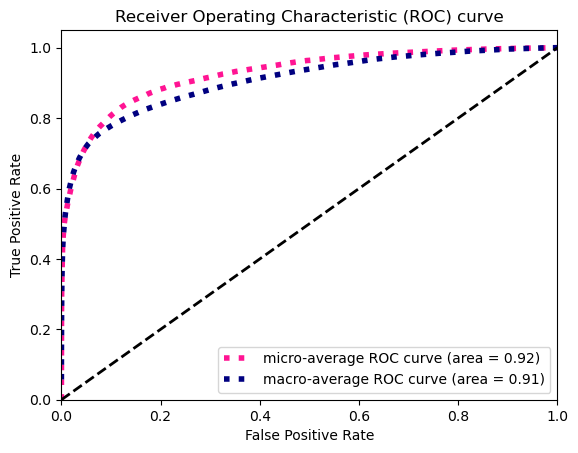

In [612]:
rep_BOW.plot_ROC_curve(y_test_mat, all_preds_test)

<a name="3.2"></a>
## 3.2 - Tfidf evaluation

In [52]:
Log_reg_tfidf = LR.MyLogisticRegression(learning_rate = 1, num_iterations = 50)
model_name = "TFIDF"

In [50]:
from importlib import reload
reload(LR)

<module 'Logistic_Reg' from '/Users/sergeiakhmadulin/My Drive/Simple NLP/Logistic_Reg.py'>

In [ ]:
w, p = train_model(Log_reg_tfidf, model_name, X_train_tfidf, y_train_mat, X_test_tfidf, batchsize=32, \
                   resume_training = False, save_results = True)

[[ 0.01874138  0.00630206 -0.00246977 ...  0.00479603  0.01624999
  -0.00336883]]
data stored 0
[[-0.00866407 -0.00828572 -0.00528473 ...  0.01025934  0.00666193
  -0.00513879]]
data stored 1
[[ 0.01458438 -0.0014634   0.02739878 ...  0.00166368  0.00793565
   0.01001653]]
data stored 2
[[ 0.00843229 -0.004792    0.02198047 ...  0.00262773  0.01852216
   0.00269361]]
data stored 3
[[-0.00164182  0.00609618 -0.00133547 ...  0.00911157 -0.00257869
   0.02353691]]
data stored 4
[[-0.0073738   0.00050356 -0.0003884  ...  0.00449843 -0.0042739
  -0.00800738]]
data stored 5
[[-0.00974033  0.00640593 -0.00670477 ... -0.0028785  -0.00846947
   0.01409349]]
data stored 6
[[ 2.01507899e-02 -1.09555222e-02 -1.11727710e-02 ...  4.82766831e-03
   6.90446530e-05 -2.31155496e-02]]
data stored 7
[[ 0.00575715  0.01559327  0.01247837 ... -0.01307338 -0.00447883
  -0.00894575]]
data stored 8
[[-0.0202689   0.0046734   0.00367232 ... -0.0140564  -0.01290472
  -0.00145575]]
data stored 9
[[ 0.01925929 -0.

In [760]:
def sigmoid(x, Θ_1, Θ_2):                                                        
    z = (Θ_1*x + Θ_2).astype("float")                                              
    return 1.0 / (1.0 + np.exp(-z)) 

In [762]:
def log_likelihood(x, y, Θ_1, Θ_2):                                                                
    sigmoid_probs = sigmoid(x, Θ_1, Θ_2)                                        
    return np.sum(y * np.log(sigmoid_probs)
                  + (1 - y) * np.log(1 - sigmoid_probs))  

In [764]:
def gradient(x, y, Θ_1, Θ_2):                                                         
    sigmoid_probs = sigmoid(x, Θ_1, Θ_2)                                        
    return np.array([[np.sum((y - sigmoid_probs) * x),                          
                     np.sum((y - sigmoid_probs) * 1)]])                         

def hessian(x, y, Θ_1, Θ_2):                                                          
    sigmoid_probs = sigmoid(x, Θ_1, Θ_2)                                        
    d1 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x * x)                  
    d2 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x * 1)                  
    d3 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * 1 * 1)                  
    H = np.array([[d1, d2],[d2, d3]])                                           
    return H

In [772]:
def newtons_method(x, y):                                                             
    """
    :param x (np.array(float)): Vector of Boston House Values in dollars
    :param y (np.array(boolean)): Vector of Bools indicting if house has > 2 bedrooms:
    :returns: np.array of logreg's parameters after convergence, [Θ_1, Θ_2]
    """

    # Initialize log_likelihood & parameters                                                                   
    Θ_1 = 15.1                                                                     
    Θ_2 = -.4 # The intercept term                                                                 
    Δl = np.Infinity                                                                
    l = log_likelihood(x, y, Θ_1, Θ_2)                                                                 
    # Convergence Conditions                                                        
    δ = .0000000001                                                                 
    max_iterations = 15                                                            
    i = 0                                                                           
    while abs(Δl) > δ and i < max_iterations:
        
        i += 1                                                                      
        g = gradient(x, y, Θ_1, Θ_2)                                                      
        hess = hessian(x, y, Θ_1, Θ_2)                                                 
        H_inv = np.linalg.inv(hess)                                                 
        # @ is syntactic sugar for np.dot(H_inv, g.T)¹
        Δ = H_inv @ g.T                                                             
        ΔΘ_1 = Δ[0][0]                                                              
        ΔΘ_2 = Δ[1][0]                                                              
                                                                                    
        # Perform our update step                                                    
        Θ_1 += ΔΘ_1                                                                 
        Θ_2 += ΔΘ_2                                                                 
                                                                                    
        # Update the log-likelihood at each iteration                                     
        l_new = log_likelihood(x, y, Θ_1, Θ_2)    
        print(i,l_new)
        Δl = l - l_new                                                           
        l = l_new                                                                
    return np.array([Θ_1, Θ_2]) 

In [758]:
X_train_tf_sc.shape, y_train_mat[:, :1].shape

((70000, 25042), (70000, 1))

In [1]:
newtons_method(X_train_tf_sc.A, y_train_mat[:, :1])

NameError: name 'newtons_method' is not defined

In [651]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [653]:
clf = OneVsRestClassifier(LogisticRegression(max_iter=50)).fit(X_train_tfidf, y_train_mat)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [681]:
from sklearn.metrics import log_loss



In [689]:
X_train_tfidf.shape

(70000, 25420)

In [691]:
X_train_tfidf

array([[0.14345704, 0.85654296],
       [0.80963995, 0.19036005],
       [0.78412229, 0.21587771],
       ...,
       [0.96505181, 0.03494819],
       [0.80084335, 0.19915665],
       [0.85548442, 0.14451558]])

In [703]:
log_loss(y_train_mat[:, :2], clf.estimators_[1].predict_proba(X_train_tfidf), eps=1e-15)

0.03592996627005272

In [659]:
clf.predict_proba(X_train_tfidf)

array([[0.85654296, 0.45923615, 0.01536333, ..., 0.00258232, 0.0026903 ,
        0.00165105],
       [0.19036005, 0.0146308 , 0.22644676, ..., 0.00666973, 0.00245874,
        0.00599102],
       [0.21587771, 0.0074708 , 0.03173683, ..., 0.00345434, 0.00198778,
        0.00211484],
       ...,
       [0.03494819, 0.00716996, 0.00769238, ..., 0.00184726, 0.00174471,
        0.00159038],
       [0.19915665, 0.00592819, 0.00430151, ..., 0.00219455, 0.0014029 ,
        0.00115299],
       [0.14451558, 0.00924296, 0.00823898, ..., 0.00503125, 0.00223206,
        0.00186031]])

In [641]:
all_weights_tfidf = np.load('all_weights_'+ model_name +'.npy',allow_pickle='TRUE').item()
all_preds_test_tfidf = np.load('all_preds_'+ model_name +'.npy').astype(np.float16)
all_preds_train_tfidf = np.load('all_preds_train_'+ model_name +'.npy').astype(np.float16)

In [647]:
all_preds_train_tfidf

array([[0.4636, 0.4429, 0.445 , ..., 0.4421, 0.4417, 0.4417],
       [0.4634, 0.4424, 0.4448, ..., 0.442 , 0.4414, 0.4414],
       [0.4636, 0.4426, 0.445 , ..., 0.4421, 0.4417, 0.4417],
       ...,
       [0.4636, 0.4426, 0.445 , ..., 0.4421, 0.4417, 0.4417],
       [0.4636, 0.4426, 0.445 , ..., 0.4421, 0.4417, 0.4417],
       [0.4634, 0.4426, 0.445 , ..., 0.4421, 0.4417, 0.4417]],
      dtype=float16)

In [257]:
Y_train_zero_ones_tfidf = (all_preds_test_tfidf >= 0.5).astype(int)
rep.calc_metrics(y_test_mat, Y_train_zero_ones_tfidf)

               precision   recall   f1-score

    micro avg       nan      0.00      nan
    macro avg       0.00      0.00      0.00
    weighted avg    0.00      0.00      0.00



/Users/sergeiakhmadulin/My Drive/Simple NLP/Classification_report.py:164: RuntimeWarning: invalid value encountered in scalar divide
  self.precision_micro = TP / (TP + FP)


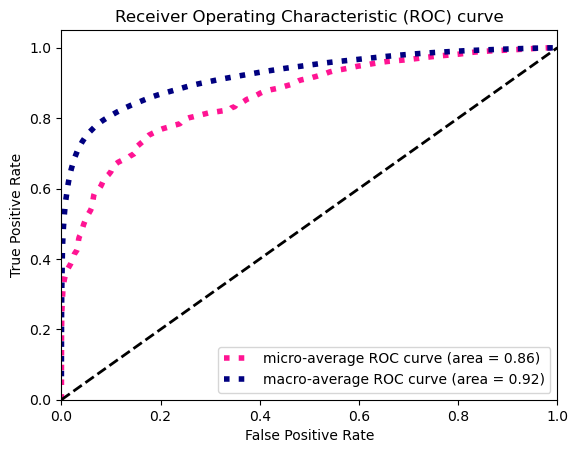

In [659]:
rep_BOW.plot_ROC_curve(y_test_mat, all_preds_test_tfidf)

<a name="3.3"></a>
## 3.3 - CBOW evaluation

In [634]:
Log_reg_cbow = LR.MyLogisticRegression(learning_rate = 0.1, num_iterations = 50)
model_name = "CBOW"

In [636]:
w, p = train_model(Log_reg_cbow, model_name, X_train_cbow, y_train_mat, X_test_cbow, batchsize=None, resume_training = False)

data stored 0
data stored 1
data stored 2
data stored 3
data stored 4
data stored 5
data stored 6
data stored 7
data stored 8
data stored 9
data stored 10
data stored 11
data stored 12
data stored 13
data stored 14
data stored 15
data stored 16
data stored 17
data stored 18
data stored 19
data stored 20
data stored 21
data stored 22
data stored 23
data stored 24
data stored 25
data stored 26
data stored 27
data stored 28
data stored 29
data stored 30
data stored 31
data stored 32
data stored 33
data stored 34
data stored 35
data stored 36
data stored 37
data stored 38
data stored 39
data stored 40
data stored 41
data stored 42
data stored 43
data stored 44
data stored 45
data stored 46
data stored 47
data stored 48
data stored 49
data stored 50
data stored 51
data stored 52
data stored 53
data stored 54
data stored 55
data stored 56
data stored 57
data stored 58
data stored 59
data stored 60
data stored 61
data stored 62
data stored 63
data stored 64
data stored 65
data stored 66
data 

In [638]:
all_weights_cbow = np.load('all_weights_'+ model_name +'.npy',allow_pickle='TRUE').item()
all_preds_test_cbow = np.load('all_preds_'+ model_name +'.npy').astype(np.float16)
all_preds_train_cbow = np.load('all_preds_train_'+ model_name +'.npy').astype(np.float16)

In [648]:
all_preds_train_cbow

array([[0.2876, 0.1868, 0.1969, ..., 0.1842, 0.1826, 0.1824],
       [0.2876, 0.1868, 0.1969, ..., 0.1842, 0.1826, 0.1824],
       [0.2876, 0.1868, 0.1969, ..., 0.1842, 0.1826, 0.1824],
       ...,
       [0.2876, 0.1868, 0.1969, ..., 0.1842, 0.1826, 0.1824],
       [0.2876, 0.1868, 0.1969, ..., 0.1842, 0.1826, 0.1824],
       [0.2876, 0.1868, 0.1969, ..., 0.1842, 0.1826, 0.1824]],
      dtype=float16)

In [253]:
Y_train_zero_ones_cbow = (all_preds_test_cbow >= 0.5).astype(int)
rep.calc_metrics(y_test_mat, Y_train_zero_ones_cbow)

               precision   recall   f1-score

    micro avg       nan      0.00      nan
    macro avg       0.00      0.00      0.00
    weighted avg    0.00      0.00      0.00



/Users/sergeiakhmadulin/My Drive/Simple NLP/Classification_report.py:164: RuntimeWarning: invalid value encountered in scalar divide
  self.precision_micro = TP / (TP + FP)


In [317]:
X_train_tfidf

<70000x25420 sparse matrix of type '<class 'numpy.float64'>'
	with 389409 stored elements in List of Lists format>

In [327]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
import sklearn

In [281]:
clf = OneVsRestClassifier(LogisticRegression(max_iter=50,penalty='l2',C=0.1)).fit(X_train_cbow, y_train_mat)

In [311]:
clf.estimators_[0].coef_[0]

array([-2.48862621e-04,  5.73793791e-02, -1.26164871e-04, ...,
        6.53589530e-05,  5.02663012e-05,  8.44468772e-05])

In [313]:
clf.estimators_[1].coef_[0]

array([-3.06910343e-04,  2.87035742e-02, -1.55593089e-04, ...,
        4.30291399e-06,  3.30196165e-06,  5.52244232e-06])

In [343]:
X, y = sklearn.datasets.make_multilabel_classification(n_samples=1000, n_classes=5, n_labels=3, random_state=42)

In [365]:
X.shape

(1000, 20)

In [353]:
clf = OneVsRestClassifier(LogisticRegression(max_iter=50,penalty='l2',C=0.1)).fit(X, y)

In [482]:
clf.estimators_[0].coef_[0]

array([-1.67010791e-01, -2.52869904e-01, -1.62635524e-01,  3.20734301e-04,
        2.05712699e-01,  1.35040063e-01,  1.35223678e-01, -2.60416379e-01,
        1.32817135e-01,  1.07444159e-01,  5.46658386e-01, -8.66075090e-02,
        6.47564725e-02,  1.98288663e-01,  1.84315359e-01,  2.30326281e-01,
       -1.26505930e-01, -1.55280211e-01,  3.70762803e-02, -2.66798648e-01])

In [538]:
clf.predict(X)

array([[1, 1, 0, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1]])

In [624]:
Log_reg_cbow = LR.MyLogisticRegression(learning_rate = 0.1, num_iterations = 50)
model_name = "test"

In [396]:
from scipy import sparse as sp_sparse
X = sp_sparse.lil_matrix(X)

In [626]:
p, w = train_model(Log_reg_cbow, model_name, X, y, X,batchsize=None, resume_training = False)

data stored 0
data stored 1
data stored 2
data stored 3
data stored 4
All models trained


In [628]:
np.sum((p>=0.5).astype(int) == y)/5000

0.7818

(1000, 5)

In [540]:
np.sum((clf.predict(X)>=0.5).astype(int) == y)/5000

0.794